In [1]:
# 박스플롯
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


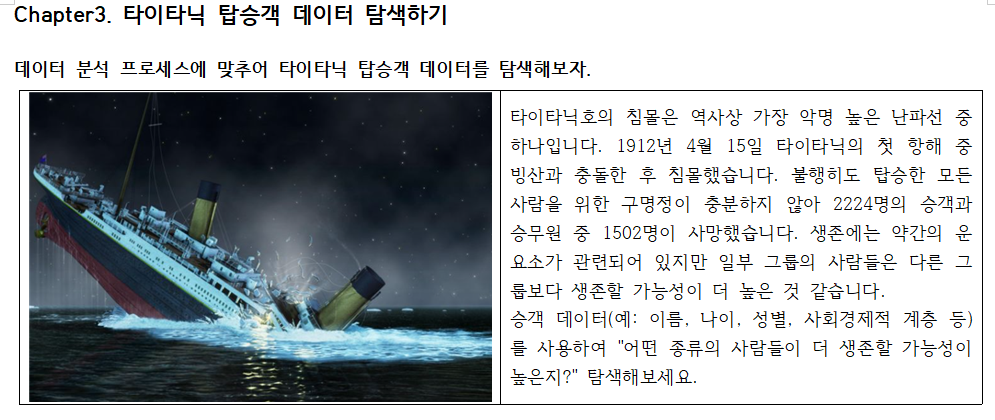

<< 데이터 분석 프로세스 알아보기 >>   
1단계: 문제 정의- 타이타닉에서 어떤 속성을 가진 사람들의 생존가능성이 높을까?  
2단계: 데이터 수집- Kaggle의 타이타닉 탑승객 데이터 수집.   
(https://www.kaggle.com/c/titanic) -> Machine Learning from Disaster -> train.csv 다운로드  
3단계: 데이터 전처리- 데이터 불러오기, 불필요한 행 제거, 결측값 확인, 결측값 채우기  
4단계: 데이터 시각화 및 통계, 분석- 통계적 개요 관찰, 그래프로 표현하기  
5단계: 데이터 분석 결과 도출 - 어떤 속성을 지닌 사람들의 생존확률이 높았을까?  

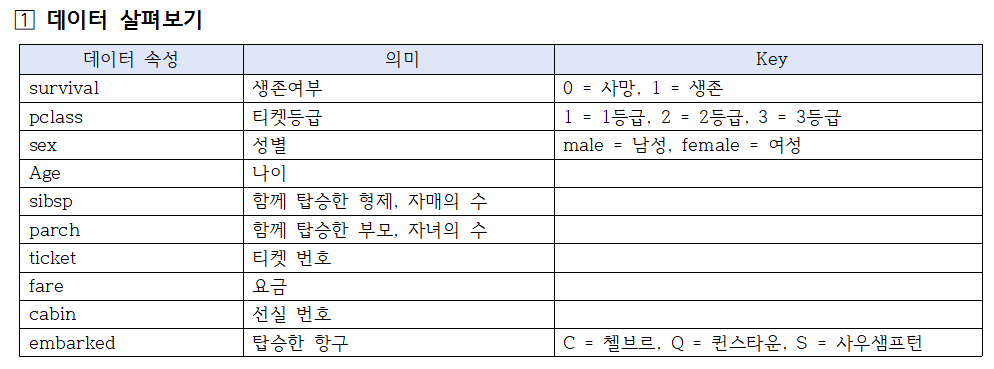

## 데이터 전처리  
① 그래프에 한글 출력이 깨지지 않도록 한글 폰트를 설치한다.

# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()


## ① 그래프에 한글 출력이 깨지지 않도록 한글 폰트를 설치한다

In [8]:
# 단계 1: 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정 (마이너스 표시 문제 해결)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

##② 파일에서 데이터 불러오기

In [3]:
#파일 업로드
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [4]:
# 데이터 불러오기
import csv
import matplotlib as plt
import pandas as pd

f = open('train.csv')
data = csv.reader(f)
header = next(data)
data = list(data)
f.close

df = pd.read_csv('train.csv')

In [5]:
# 헤더를 출력하여 데이터의 속성 확인하기
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# 데이터 잘 들어왔는지 행별로 출력해보기.


## ③ 결측값 처리하기  
자료 전체의 특징을 대표적으로 나타내는 값을 대푯값이라고 합니다.   
대푯값으로는 평균, 중앙값, 최빈값 등이 있습니다.   
데이터에서 결측값이 있는 속성은 나이, 선실번호, 탑승한 항구가 있습니다.      차례대로 결측값을 처리해 봅니다.

##1) 나이의 결측값 처리하기
나이의 대푯값으로는 평균을 사용하는 것이 적절하다.

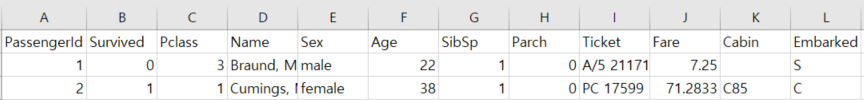

In [7]:
# 평균 나이(avg_age) 구하기

# age가 결측치가 아니면 나이 합구하고 인원수 증가



# 평균 나이(avg_age) 구하기


In [8]:
#결측값이 있는 행 찍어보기


In [9]:
#나이 결측값을 평균 나이로 대체해보자.


# 잘 바뀌었는지 확인해보기


##2) 선실 번호의 결측값은 생존확률과도 관계가 적고, 대푯값을 정하는 것도 적절하지 않다.
-> 결측치 처리가 필요하지 않다

##3) 탑승한 항구의 결측값 대체하기
탑승한 항구의 대푯값은 최빈값(가장 많이 나타난 값)으로 대체하는 것이 적합하다.

In [10]:
#Embarked의 최빈값 찾기 – 리스트에 저장 후 히스토그램 그리기.
Embarked = []




In [11]:
#Embarked의 결측값이 있는 행 출력해보기


In [12]:
#Embarked의 결측값을 최빈값으로 대체해보세요.


In [13]:
#히스토그램을 이용해 Embarked의 빈도수를 확인하기


In [14]:
for row in data :
    print(row[11])

S
C
S
S
S
Q
S
S
S
C
S
S
S
S
S
S
Q
S
S
C
S
S
Q
S
S
S
C
S
Q
S
C
C
Q
S
C
S
C
S
S
C
S
S
C
C
Q
S
Q
Q
C
S
S
S
C
S
C
S
S
C
S
S
C

S
S
C
C
S
S
S
S
S
S
S
C
S
S
S
S
S
S
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
C
C
S
S
S
S
S
S
S
S
S
S
S
Q
S
C
S
S
C
S
Q
S
C
S
S
S
C
S
S
C
Q
S
C
S
C
S
S
S
S
C
S
S
S
C
C
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
C
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
S
Q
S
S
C
S
S
C
S
S
S
C
S
S
S
S
Q
S
Q
S
S
S
S
S
C
C
Q
S
Q
S
S
S
S
C
S
S
S
C
Q
C
S
S
S
S
Q
C
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
Q
S
S
C
Q
S
S
S
S
S
S
S
S
S
C
C
S
C
S
Q
S
S
S
Q
S
S
S
S
S
S
S
S
C
Q
S
S
S
Q
S
Q
S
S
S
S
C
S
S
S
Q
S
C
C
S
S
C
C
S
S
C
Q
Q
S
Q
S
S
C
C
C
C
C
C
S
S
S
S
S
S
S
C
S
S
Q
S
S
C
S
S
S
C
Q
S
S
S
S
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
S
C
S
S
S
Q
Q
S
C
C
S
Q
S
C
C
Q
C
C
S
S
C
S
C
S
C
C
S
C
C
S
S
S
S
S
S
Q
C
S
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
Q
Q
S
S
S
S
S
S
S
C
Q
S
S
S
S
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
S
S
S
C
C
S
C
S
S
S
Q
S
S
S
S
S
S
S
S
Q
C
S
S
S
C
S
S
S
S
S
S
S
S
S
S
C
S
S
C
S
S
S
S
S
C
S
C
C
S
S
S
S

## 딕셔너리 복습하기

# 딕셔너리
- { 키 : 값 } 의 쌍을 저장하는 대용량의 자료구조
- 키는 절대 중복될 수 없고, 값은 여러 번 중복되도 상관없다
- 리스트, 딕셔너리는 키로 사용될 수 없음

- **딕셔너리[키] = 값**을 통해 **키, 값 을 추가**할 수 있다.
- 딕셔너리[키] 를 통해 값에 **접근** 할 수 있다.
- 딕셔너리[키] = 값을 통해 **값을 변경**할 수 있다.




In [15]:
dic = { 'boy':'소년', 'school': '학교', 'book':'책'}


In [16]:
# 리스트에 알파벳이 몇개가 등장하는 지 딕셔너리로 출력

alphabet = ['a','a', 'b', 'b', 'b', 'c','d', 'c', 'd', 'e','f','g', 'g']
# 결과 {'a': 2, 'b': 3, 'c': 2, 'd': 2, 'e': 1, 'f': 1, 'g': 2}

##  데이터 시각화하기


Q1. 타이타닉 호의 생존률은 얼마나 될까?

###1) 타이타닉의 사망자, 생존자를 딕셔너리에 저장하여 BarChart로 표현하기

{'0': 1, '1': 0}
{'0': 1, '1': 1}
{'0': 1, '1': 2}
{'0': 1, '1': 3}
{'0': 2, '1': 3}
{'0': 3, '1': 3}
{'0': 4, '1': 3}
{'0': 5, '1': 3}
{'0': 5, '1': 4}
{'0': 5, '1': 5}
{'0': 5, '1': 6}
{'0': 5, '1': 7}
{'0': 6, '1': 7}
{'0': 7, '1': 7}
{'0': 8, '1': 7}
{'0': 8, '1': 8}
{'0': 9, '1': 8}
{'0': 9, '1': 9}
{'0': 10, '1': 9}
{'0': 10, '1': 10}
{'0': 11, '1': 10}
{'0': 11, '1': 11}
{'0': 11, '1': 12}
{'0': 11, '1': 13}
{'0': 12, '1': 13}
{'0': 12, '1': 14}
{'0': 13, '1': 14}
{'0': 14, '1': 14}
{'0': 14, '1': 15}
{'0': 15, '1': 15}
{'0': 16, '1': 15}
{'0': 16, '1': 16}
{'0': 16, '1': 17}
{'0': 17, '1': 17}
{'0': 18, '1': 17}
{'0': 19, '1': 17}
{'0': 19, '1': 18}
{'0': 20, '1': 18}
{'0': 21, '1': 18}
{'0': 21, '1': 19}
{'0': 22, '1': 19}
{'0': 23, '1': 19}
{'0': 24, '1': 19}
{'0': 24, '1': 20}
{'0': 24, '1': 21}
{'0': 25, '1': 21}
{'0': 26, '1': 21}
{'0': 26, '1': 22}
{'0': 27, '1': 22}
{'0': 28, '1': 22}
{'0': 29, '1': 22}
{'0': 30, '1': 22}
{'0': 30, '1': 23}
{'0': 30, '1': 24}
{'0': 31, '

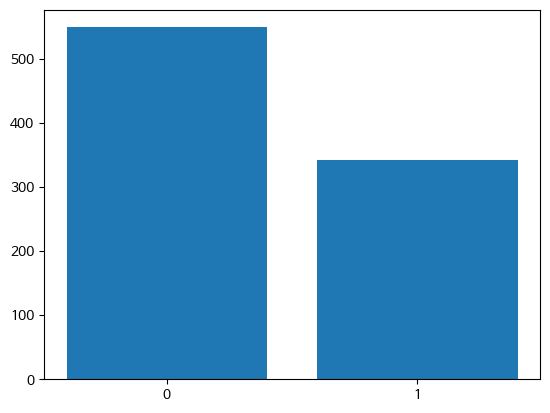

In [19]:
#타이타닉의 사망자, 생존자를 딕셔너리에 저장하여 BarChart로 표현하기
survived={'0':0, '1':0}

for row in data:
  if row[1] == '0':
    survived['0']+=1
  else:
    survived['1']+=1

  print(survived)

#바그래프 그리기
plt.bar(survived.keys(), survived.values())
plt.show()

### Q2. 여성과 남성 중 어떤 성별이 더 생존확률이 높을까?

In [20]:
#성별 별 생존자 수 (survivers by gender)
SBG ={'생존남성':0, '사망남성':0, '생존여성':0, '사망여성':0}

for row in data:
  if row[4] == 'male':
    if row[1] == '1':
      SBG['생존남성'] += 1
    else:
      SBG['사망남성'] += 1

  else:
    if row[1] == '1':
      SBG['생존여성'] += 1
    else:
      SBG['사망여성'] += 1

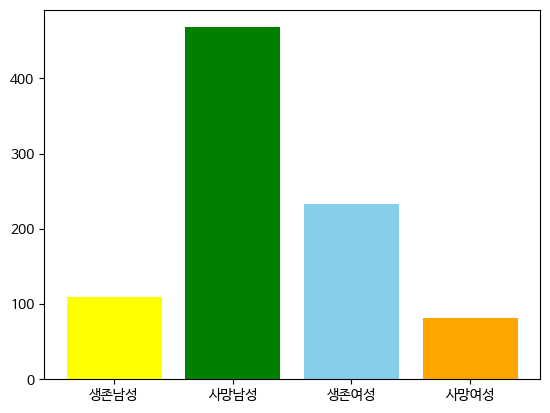

In [21]:
#Bar그래프로 나타내기.

import matplotlib.pyplot as plt

plt.bar(SBG.keys(), SBG.values(), color=['yellow', 'green', 'skyblue', 'orange'])
plt.show()

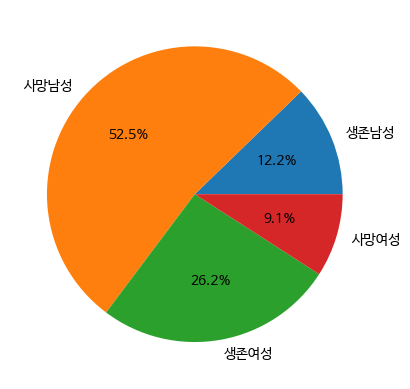

In [24]:
#원형그래프로 나타내기

plt.pie(SBG.values(), labels=SBG.keys(), autopct='%1.1f%%') #뒤의 %%는 뒤에있는 %를 나타냄
plt.show()

## Q3. 어떤 등급의 티켓을 구매한 사람이 더 많이 생존했을까?

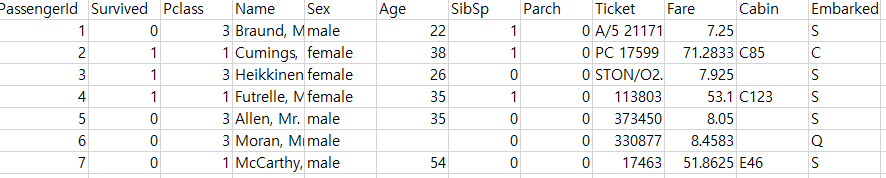

In [28]:
#티켓 등급별 생존자수  티켓등급: [사망, 생존]
Ticket = ['1st Sur', '1st Dead','2nd Sur', '2nd Dead','3rd Sur', '3rd Dead']
clsur=[0,0,0,0,0,0]

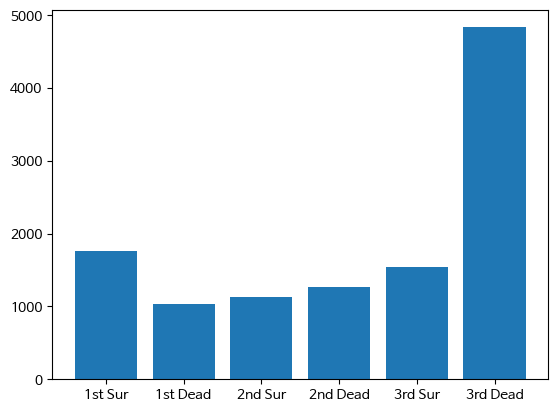

In [42]:
#바그래프 그리기

for row in data:
  if row[2] == '1':
    if row[1] == '1':
      clsur[0]+=1
    else:
      clsur[1]+=1

  elif row[2] == '2':
    if row[1] == '1':
      clsur[2]+=1
    else:
      clsur[3]+=1

  else:
    if row[1] == '1':
      clsur[4]+=1
    else:
      clsur[5]+=1

plt.bar(Ticket, clsur)
plt.show()

([<matplotlib.patches.Wedge at 0x7913601a2aa0>,
 [Text(0.9759356905929224, 0.5074933771261609, '1st Sur'),
  Text(0.3561073753617581, 1.0407629591856928, '1st Dead'),
  Text(-0.2818901487621368, 1.06326757875469, '2nd Sur'),
  Text(-0.8670505436590903, 0.6769219709393959, '2nd Dead'),
  Text(-1.094643635836874, -0.10842190978685706, '3rd Sur'),
  Text(0.2818901736497106, -1.0632675721565745, '3rd Dead')],
 [Text(0.5323285585052303, 0.2768145693415423, '15.3%'),
  Text(0.19424038656095896, 0.5676888868285597, '9.0%'),
  Text(-0.15375826296116551, 0.5799641338661944, '9.8%'),
  Text(-0.47293666017768554, 0.36923016596694314, '10.9%'),
  Text(-0.5970783468201131, -0.05913922352010385, '13.4%'),
  Text(0.15375827653620577, -0.5799641302672224, '41.8%')])

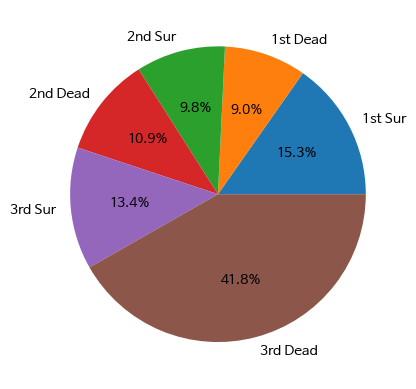

In [41]:
plt.pie(clsur, labels=Ticket, autopct='%1.1f%%')

## 번외Q) 이름에서는 어떤 정보를 얻을 수 있을까?

In [ ]:
#이름에서 사회적 지위 파악하기




['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
Braund, Mr. Owen Harris
['Braund, Mr', ' Owen Harris']
Braund, Mr
Mr


In [ ]:
#4개의 사회적 그룹으로 나누어 row[12] 에 추가하기

A = ['Jonkheer', 'the Countess'] # 귀족, 작위
B = ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'] # 명예직
C = ['Ms', 'Mmn', 'Mrs', 'Dona', 'Mr', 'Don']#교수 등
D = ['Master', 'Miss', 'Mlle', 'Lady']#기혼, 미혼



C C D C C C C D C C D D C C D C D C C C C C D C D C C C D C C C D C C C C C D D C C C D D C C D C C D C C C C C D C D D C D C D C D C C D C C D C C C C C C D D C C D C D C C C D C C C C C C C C C C C D C C C C C D C C D C D C D D C C C C D C C C D C D C C D C C C C C C C D C C C C D C C C C C D C B B C C C C C D C C D C C C C D D C C C C C D D C C C D D C C D C D D D C C C C C C C D D C D C C D D C C C C C D C C D C C D C C C D D C D C C C C C C C C C C D C C C D C D C D C C D D C C C B D C C B C C C C C C C D D C C D C C D C C C C D C C C C D D D C D C C C C C C C C C C D D C C D C C C D C C D C C D C D D C C D D D C C C D C B D C C C D C C D C C C D D C C C C C C D C C D D C C C D D C D C C C C C C C D D D D C C C C C C C C D D C C C C D C D C C C D D C C C C D D C D C C C D C C D C B C C C D C D C C D C D C C D C C C C D C D C C C C C C C D C C C C C C C D D C C C C C C C C D D C D B C C C C C C C C D C C C C C C C C C C D C C C C D C C C C D D C C C C D C C C D C C C C C C D C C C 

In [ ]:
#어떤 사회적 지위를 가진 사람들이 많이 탑승했을까?
stat =[]



[2, 19, 644, 226]
